<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_2_multiple_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Multiple LSTMs

In this lab, you will look at how to build a model with multiple LSTM layers. Since you know the preceding steps already (e.g. downloading datasets, preparing the data, etc.), we won't expound on it anymore so you can just focus on the model building code.

## Download and Prepare the Dataset

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

In [1]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Like the previous lab, we increased the `BATCH_SIZE` here to make the training faster. If you are doing this on your local machine and have a powerful processor, feel free to use the value used in the lecture (i.e. 64) to get the same results as Laurence.

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data , test_data = dataset['train'], dataset['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_data.padded_batch(BATCH_SIZE)


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

## Build and Compile the Model

You can build multiple layer LSTM models by simply appending another `LSTM` layer in your `Sequential` model and enabling the `return_sequences` flag to `True`. This is because an `LSTM` layer expects a sequence input so if the previous layer is also an LSTM, then it should output a sequence as well. See the code cell below that demonstrates this flag in action. You'll notice that the output dimension is in 3 dimensions `(batch_size, timesteps, features)` when when `return_sequences` is True.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense


import numpy as np


batch_size = 1
time_steps = 20
features = 16
lstm_dim = 8

random_input = np.random.rand(batch_size,time_steps,features)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

print("input_dim:", random_input.shape)
lstm = LSTM(lstm_dim)
output = lstm(random_input)
print("output_dim:", output.shape)

lstm_return = LSTM(lstm_dim, return_sequences = True)
output_return = lstm_return(random_input)
print("output_return_dim:", output_return.shape)


input_dim: (1, 20, 16)
output_dim: (1, 8)
output_return_dim: (1, 20, 8)


In [3]:
import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8
shape of input array: (1, 20, 16)
shape of lstm output(return_sequences=False): (1, 8)
shape of lstm output(return_sequences=True): (1, 20, 8)


The next cell implements the stacked LSTM architecture.

In [6]:
import tensorflow as tf

embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

model = Sequential([
    Embedding(tokenizer.vocab_size, output_dim = embedding_dim),
    Bidirectional(LSTM(lstm1_dim, return_sequences = True)),
    Bidirectional(LSTM(lstm2_dim)),
    Dense(dense_dim , activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [4]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [5]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the Model

The additional LSTM layer will lengthen the training time compared to the previous lab. Given the default parameters we set, it will take around 2 minutes per epoch with the Colab GPU enabled. 172511

In [19]:
history = globals()['_7']

In [15]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'tf', '_i2', '_2', '_i3', 'tfds', 'dataset', 'info', 'tokenizer', '_i4', 'BUFFER_SIZE', 'BATCH_SIZE', 'train_data', 'test_data', 'train_dataset', 'test_dataset', '_i5', 'Sequential', 'Embedding', 'LSTM', 'Bidirectional', 'Dense', 'np', 'batch_size', 'time_steps', 'features', 'lstm_dim', 'random_input', 'lstm', 'output', 'lstm_return', 'output_return', '_i6', 'embedding_dim', 'lstm1_dim', 'lstm2_dim', 'dense_dim', 'model', '_i7', 'EPOCHS', '_7', '_i8', 'plt', 'plot_graphs', '_i9', '_9', '_i10', '_i11', '_i12', '_i13', '_i14', '_14', '_i15'])

In [12]:
globals().variables('_7')

AttributeError: 'dict' object has no attribute 'variables'

In [ ]:
i

In [7]:
EPOCHS = 10
history = model.fit(train_dataset, validation_data = test_dataset, epochs = EPOCHS)

Epoch 1/10
98/98 [==============================] - 55s 516ms/step - loss: 0.6166 - accuracy: 0.6509 - val_loss: 0.6089 - val_accuracy: 0.7096
Epoch 2/10
98/98 [==============================] - 48s 493ms/step - loss: 0.4860 - accuracy: 0.7683 - val_loss: 0.5093 - val_accuracy: 0.7672
Epoch 3/10
98/98 [==============================] - 48s 494ms/step - loss: 0.3226 - accuracy: 0.8706 - val_loss: 0.4052 - val_accuracy: 0.8346
Epoch 4/10
98/98 [==============================] - 48s 490ms/step - loss: 0.2671 - accuracy: 0.9011 - val_loss: 0.4047 - val_accuracy: 0.8261
Epoch 5/10
98/98 [==============================] - 49s 497ms/step - loss: 0.2293 - accuracy: 0.9156 - val_loss: 0.4386 - val_accuracy: 0.8369
Epoch 6/10
98/98 [==============================] - 50s 513ms/step - loss: 0.1664 - accuracy: 0.9434 - val_loss: 0.4617 - val_accuracy: 0.8532
Epoch 7/10
98/98 [==============================] - 48s 495ms/step - loss: 0.1319 - accuracy: 0.9573 - val_loss: 0.4910 - val_accuracy: 0.8236

In [6]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
15/98 [===>..........................] - ETA: 3:20:06 - loss: 0.6929 - accuracy: 0.5182

KeyboardInterrupt: 

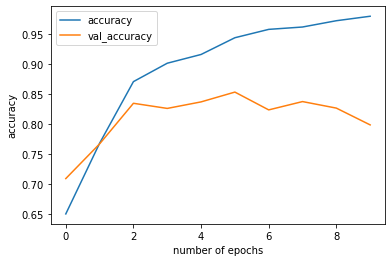

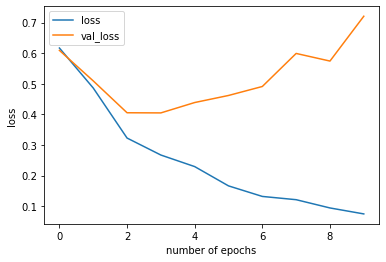

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("number of epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

plot_graphs(history,'accuracy')

plot_graphs(history,'loss')

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Wrap Up

This lab showed how you can build deep networks by stacking LSTM layers. In the next labs, you will continue exploring other architectures you can use to implement your sentiment classification model.